In [20]:
import json
import pandas as pd

with open("../input_size.json") as f:
    data = json.load(f)
    df = pd.json_normalize(data)

df['gpu_energy.joules'] = df['gpu_energy'] * 3600000
df['gpu_energy.request'] = df['gpu_energy.joules'] / 100
df

,name,model,debug_mode,timestamp,project_name,run_id,experiment_id,duration,emissions,emissions_rate,...,pue,config.type,config.path,config.accuracy,config.consumption,config.info.max_output_tokens,config.info.mean,config.info.std,gpu_energy.joules,gpu_energy.request
0,input_size,mistralai/Mistral-Small-3.1-24B-Instruct-2503,False,2025-05-22T09:41:28,codecarbon,c4591df3-4a70-49f2-9261-c4e32c26affd,1,1.764661,0.000066,0.000037,...,1,csv,datasets/context_window/input_size/processed_O...,False,True,50,24.39,4.417356,545.077076,5.450771
1,input_size,mistralai/Mistral-Small-3.1-24B-Instruct-2503,False,2025-05-22T09:41:35,codecarbon,74d4d447-4853-488e-8a70-e6184bf82abd,1,2.310197,0.000104,0.000045,...,1,csv,datasets/context_window/input_size/processed_O...,False,True,50,215.22,25.423913,942.071456,9.420715
2,input_size,mistralai/Mistral-Small-3.1-24B-Instruct-2503,False,2025-05-22T09:41:41,codecarbon,1d1829d7-256e-44dd-9407-a58509da3e88,1,4.256969,0.000348,0.000082,...,1,csv,datasets/context_window/input_size/processed_O...,False,True,50,406.62,28.606272,3726.291972,37.262920
3,input_size,mistralai/Mistral-Small-3.1-24B-Instruct-2503,False,2025-05-22T09:41:50,codecarbon,b271c916-f55f-418a-8227-aee2497aa9d2,1,4.494695,0.000375,0.000084,...,1,csv,datasets/context_window/input_size/processed_O...,False,True,50,802.95,48.202304,4038.092028,40.380920


In [10]:
df['gpu_energy.divided'] = df['gpu_energy.request'] / df['config.info.mean']

In [ ]:
df

In [11]:
result_df = df.groupby(['model', 'config.info.mean'], as_index=False).agg({
    'gpu_energy.joules': 'mean',
    # Add other columns with their aggregation methods
    **{col: 'first' for col in df.columns if col not in ['model', 'config.info.mean', 'gpu_energy.joules']}
})

In [12]:
df.groupby('config.info.mean')['gpu_energy.joules'].mean().reset_index()


,config.info.mean,gpu_energy.joules
0,24.39,545.077076
1,215.22,942.071456
2,406.62,3726.291972
3,802.95,4038.092028


In [ ]:
df

In [13]:
result_df = df.groupby(['model', 'config.info.mean'], as_index=False).agg({
    'gpu_energy.joules': 'mean',
    # Add other columns with their aggregation methods
    **{col: 'first' for col in df.columns if col not in ['model', 'config.info.mean', 'gpu_energy.joules']}
})

In [14]:
result_df.set_index('config.info.mean', inplace=True)


model
mistralai/Mistral-Small-3.1-24B-Instruct-2503    Axes(0.125,0.11;0.775x0.77)
Name: gpu_energy.divided, dtype: object

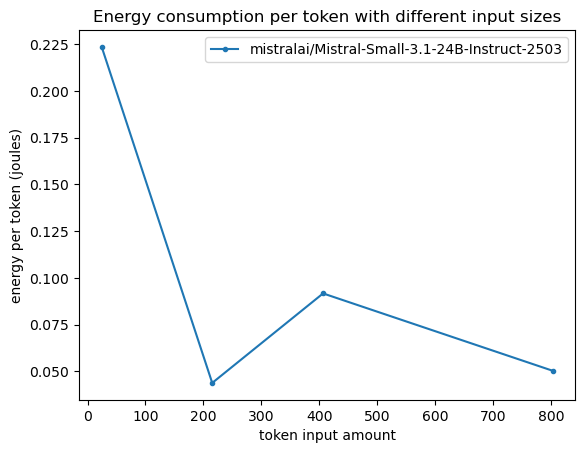

In [15]:
result_df.groupby('model')['gpu_energy.divided'].plot(
    legend=True,
    xlabel='token input amount',
    ylabel='energy per token (joules)',
    rot=0,
    title='Energy consumption per token with different input sizes',
    style='.-',
)

<Axes: title={'center': 'Energy consumption per request with different input sizes'}, xlabel='token input amount', ylabel='Total request energy consumption (joules)'>

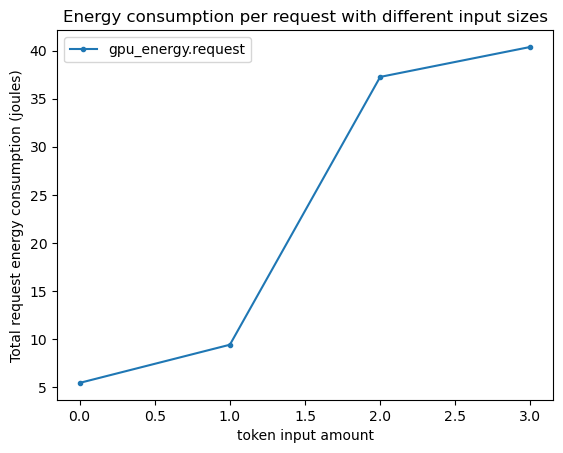

In [22]:
df['gpu_energy.request'].plot(
    legend=True,
    xlabel='token input amount',
    ylabel='Total request energy consumption (joules)',
    rot=0,
    title='Energy consumption per request with different input sizes',
    style='.-',
)